In [2]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Part 1: read your data into your program
try:
    df = pd.read_csv("Spotify-2000.csv", index_col=False, thousands=',')
except FileNotFoundError:
    print("Add the file 'Spotify-2000.csv' to the same directory as this script")
    sys.exit()

In [3]:
import numpy as np
# Part 1: continued
# lets drop columns that we will not be using
try:
    df = df.drop(['Index', 'Title', 'Artist', 'Year'], axis = 1) 
except KeyError:
    pass    # KeyError raised when rerunning script (columns have already been dropped)

        
# lets encode the feature 'Top Genre' as it is non-numeric (assignment 1)
genre_counts = df['Top Genre'].value_counts()
list_of_genres = list(genre_counts.index.values)
le = preprocessing.LabelEncoder()
le.fit(list_of_genres)
df['Top Genre'] = le.transform(df['Top Genre'])

# Save data in 2 parallel matrices, one for features (X), and one for labels (y).
X = df.drop('Popularity', axis = 1)
y = df['Popularity']

# now lets make our continuous label 'Popularity' into categories
# If a song is in the Top 50, it is popular

isPopular = pd.cut(y, bins=[1,50,100],labels=['yes','no'])
y = y.to_frame()
y.insert(0,'isPopular', isPopular)
# remove the continuous Popularity column which we will no longer be using
y.drop('Popularity', axis=1, inplace=True)

In [86]:
# Part 2, 3 and 4:
from sklearn.model_selection import train_test_split
from sklearn import tree

# first we must conver all columnn types to floats/ints (for the classifier to work)
X['Length (Duration)'].astype(float)

total_testing_accuracy = 0
total_training_accuracy = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=350, min_samples_leaf=50)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    total_testing_accuracy += clf.score(X_test, y_test)
    total_training_accuracy += clf.score(X_train, y_train)
    print("Training Accuracy in iteration " + str(i+1) + ": " + str(clf.score(X_train, y_train)))
    print("Testing Accuracy in iteration " + str(i+1) + ": " + str(clf.score(X_test, y_test)))
    print('\n')

print("Average training accuracy: " + str(total_training_accuracy/10))
print("Average testing accuracy: " + str(total_testing_accuracy/10))

Training Accuracy in iteration 1: 0.793730407523511
Testing Accuracy in iteration 1: 0.7944862155388471


Training Accuracy in iteration 2: 0.7956112852664576
Testing Accuracy in iteration 2: 0.7869674185463659


Training Accuracy in iteration 3: 0.7874608150470219
Testing Accuracy in iteration 3: 0.8195488721804511


Training Accuracy in iteration 4: 0.7962382445141066
Testing Accuracy in iteration 4: 0.7844611528822055


Training Accuracy in iteration 5: 0.7905956112852665
Testing Accuracy in iteration 5: 0.8070175438596491


Training Accuracy in iteration 6: 0.7887147335423198
Testing Accuracy in iteration 6: 0.8145363408521303


Training Accuracy in iteration 7: 0.7918495297805642
Testing Accuracy in iteration 7: 0.8020050125313283


Training Accuracy in iteration 8: 0.7949843260188088
Testing Accuracy in iteration 8: 0.7894736842105263


Training Accuracy in iteration 9: 0.7912225705329153
Testing Accuracy in iteration 9: 0.8045112781954887


Training Accuracy in iteration 10: 0.7

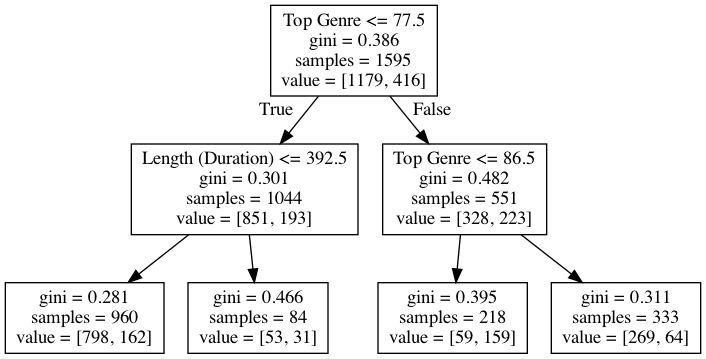

In [69]:
from IPython.display import Image  
from six import StringIO  
import pydotplus

features = list(X[:])
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



In [67]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(clf, X, y, cv=10);

print(cv_results);

{'fit_time': array([0.01646686, 0.01544499, 0.01872396, 0.01167274, 0.01313186,
       0.00855494, 0.01024795, 0.01089001, 0.01415229, 0.02049685]), 'score_time': array([0.0063231 , 0.00612998, 0.00379205, 0.00451922, 0.00349903,
       0.00340509, 0.00637817, 0.00793386, 0.00691199, 0.00451303]), 'test_score': array([0.78      , 0.775     , 0.765     , 0.815     , 0.88442211,
       0.75879397, 0.77889447, 0.79396985, 0.77386935, 0.81407035])}
